In [2]:
from tensorflow import keras
from sklearn.model_selection import train_test_split

In [5]:
(train_input, train_target), (test_input, test_target) = keras.datasets.fashion_mnist.load_data()

4422102/4422102 [==============================] - 1s 0us/step


In [9]:
train_input, val_input, train_target, val_target = train_test_split(train_input, train_target, test_size = 0.1)

In [18]:
train_scaled = train_input.reshape(-1, 28, 28, 1) /255
val_scaled = val_input.reshape(-1, 28, 28, 1) /255
test_scaled = test_input.reshape(-1, 28, 28, 1) /255

In [21]:
model = keras.Sequential()
model.add(keras.layers.Conv2D(filters = 32, kernel_size = (3, 3), padding = 'same', activation = 'relu', input_shape = (28, 28, 1)))
model.add(keras.layers.MaxPooling2D(2))
model.add(keras.layers.Conv2D(filters = 16, kernel_size = (3, 3), padding = 'same', activation = 'relu'))
model.add(keras.layers.MaxPooling2D(2))

model.add(keras.layers.Flatten())
model.add(keras.layers.Dense(100, activation = 'relu'))
model.add(keras.layers.Dropout(0.3))
model.add(keras.layers.Dense(10, activation = 'softmax'))

es = keras.callbacks.EarlyStopping(patience = 3, restore_best_weights=True)

model.compile(loss='sparse_categorical_crossentropy', metrics = 'accuracy', optimizer = 'adam')

hist = model.fit(train_scaled, train_target, epochs = 10000, validation_data=(val_scaled, val_target), callbacks= [es])

Epoch 1/10000
1519/1519 [==============================] - 40s 26ms/step - loss: 0.5263 - accuracy: 0.8086 - val_loss: 0.3543 - val_accuracy: 0.8743
Epoch 2/10000
1519/1519 [==============================] - 42s 28ms/step - loss: 0.3563 - accuracy: 0.8709 - val_loss: 0.3270 - val_accuracy: 0.8852
Epoch 3/10000
1519/1519 [==============================] - 39s 26ms/step - loss: 0.3088 - accuracy: 0.8864 - val_loss: 0.2943 - val_accuracy: 0.8963
Epoch 4/10000
1519/1519 [==============================] - 39s 26ms/step - loss: 0.2782 - accuracy: 0.8979 - val_loss: 0.2687 - val_accuracy: 0.9046
Epoch 5/10000
1519/1519 [==============================] - 39s 26ms/step - loss: 0.2572 - accuracy: 0.9032 - val_loss: 0.2567 - val_accuracy: 0.9083
Epoch 6/10000
1519/1519 [==============================] - 39s 26ms/step - loss: 0.2380 - accuracy: 0.9114 - val_loss: 0.2517 - val_accuracy: 0.9085
Epoch 7/10000
1519/1519 [==============================] - 40s 26ms/step - loss: 0.2227 - accuracy: 0.9168

In [24]:
test_target = test_target[:6000]
model.evaluate(test_scaled, test_target)

188/188 [==============================] - 3s 14ms/step - loss: 20.7046 - accuracy: 0.0937


[20.704551696777344, 0.09366666525602341]

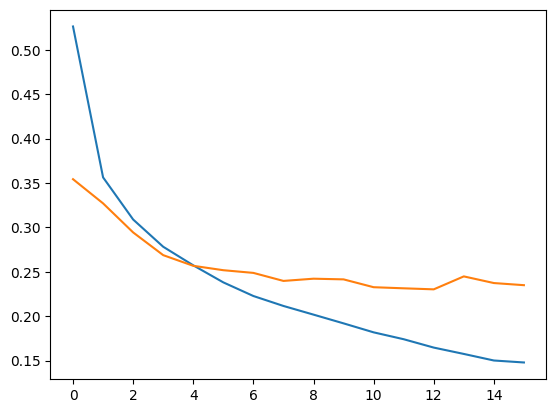

In [23]:
import matplotlib.pyplot as plt

plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])